# Assignment– 2 : Classification, Feature Engineering, Deployment
**Roll Number:23M1073**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle

# Problem- 1

In [42]:
data_red = pd.read_csv('winequality-red.csv', delimiter=';')
data_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [43]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [47]:
# Red_wine--

for col in data_red.columns.values: # For each column
  list_vals = pd.unique(data_red[col])    # Create a list of unique values
  print(col + ' is of type ' + str(data_red[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(data_red[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

fixed acidity is of type float64, has 96 unique values, and 0 null entries
volatile acidity is of type float64, has 143 unique values, and 0 null entries
citric acid is of type float64, has 80 unique values, and 0 null entries
residual sugar is of type float64, has 91 unique values, and 0 null entries
chlorides is of type float64, has 153 unique values, and 0 null entries
free sulfur dioxide is of type float64, has 60 unique values, and 0 null entries
total sulfur dioxide is of type float64, has 144 unique values, and 0 null entries
density is of type float64, has 436 unique values, and 0 null entries
pH is of type float64, has 89 unique values, and 0 null entries
sulphates is of type float64, has 96 unique values, and 0 null entries
alcohol is of type float64, has 65 unique values, and 0 null entries
quality is of type int64, has 6 unique values, and 0 null entries
  These are: 5, 6, 7, 4, 8, 3


In [48]:
# white_wine---

for col in data_white.columns.values: # For each column
  list_vals = pd.unique(data_white[col])    # Create a list of unique values
  print(col + ' is of type ' + str(data_white[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(data_white[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

fixed acidity is of type float64, has 68 unique values, and 0 null entries
volatile acidity is of type float64, has 125 unique values, and 0 null entries
citric acid is of type float64, has 87 unique values, and 0 null entries
residual sugar is of type float64, has 310 unique values, and 0 null entries
chlorides is of type float64, has 160 unique values, and 0 null entries
free sulfur dioxide is of type float64, has 132 unique values, and 0 null entries
total sulfur dioxide is of type float64, has 251 unique values, and 0 null entries
density is of type float64, has 890 unique values, and 0 null entries
pH is of type float64, has 103 unique values, and 0 null entries
sulphates is of type float64, has 79 unique values, and 0 null entries
alcohol is of type float64, has 103 unique values, and 0 null entries
quality is of type int64, has 7 unique values, and 0 null entries
  These are: 6, 5, 7, 8, 4, 3, 9


# Observation:

**None of the columns have any null entries for red_wine and white_wine**

# Countplot of wine data of all different qualities

<Axes: xlabel='quality', ylabel='count'>

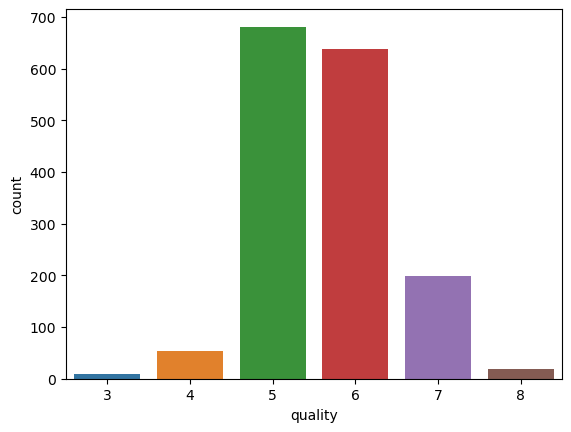

In [49]:
sns.countplot(x='quality',data=data_red)

<Axes: xlabel='quality', ylabel='count'>

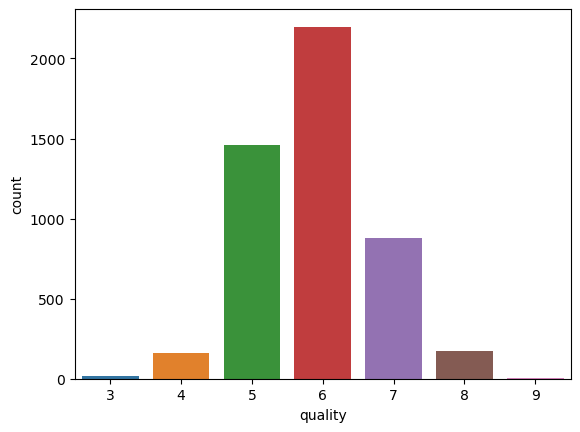

In [50]:
sns.countplot(x='quality',data=data_white)

# Plot out the data

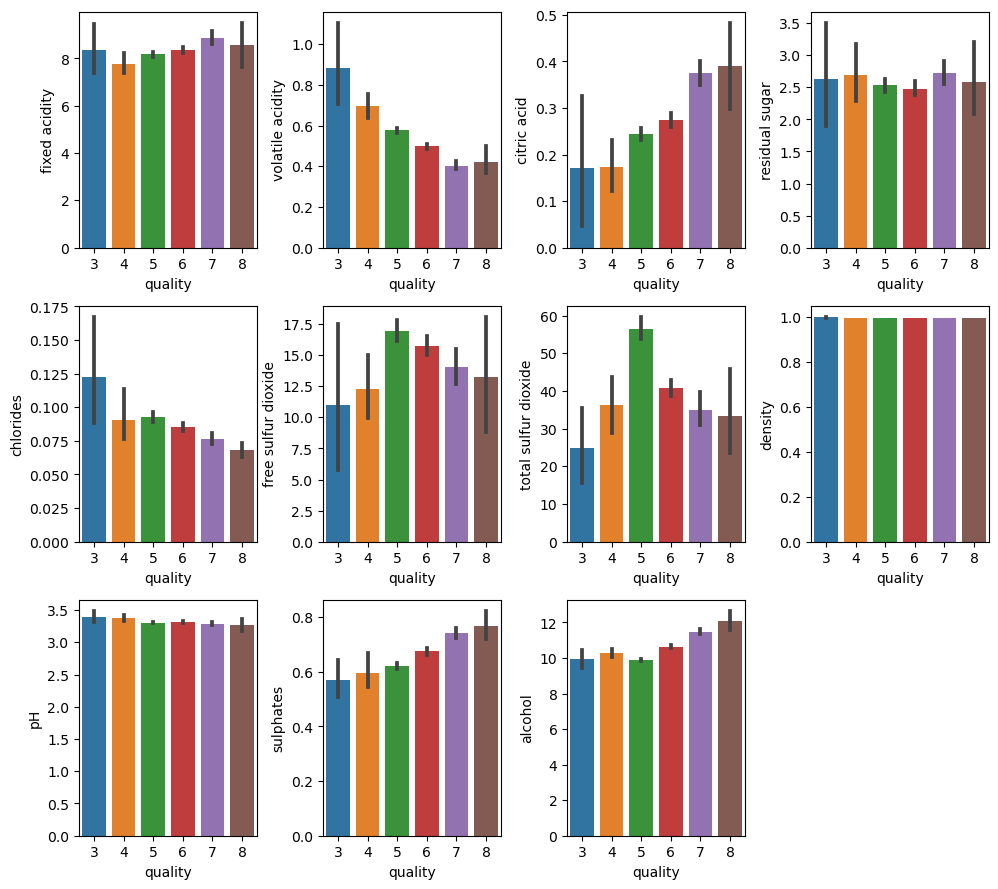

In [51]:
# red_wine--
fig = plt.figure(figsize=(10,9))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=data_red)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=data_red)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=data_red)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=data_red)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=data_red)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=data_red)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=data_red)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=data_red)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=data_red)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=data_red)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=data_red)

plt.tight_layout()

# Observation of red_wine from the above plot

**a)Quality is high when volatile acidity is less.**

**b)Quality is high when citric acid is high.**

**c)Quality is high when chlorides are less.**

**d)Quality is high when sulphates are more.**

**e)Quality is high when alcohol is more.**

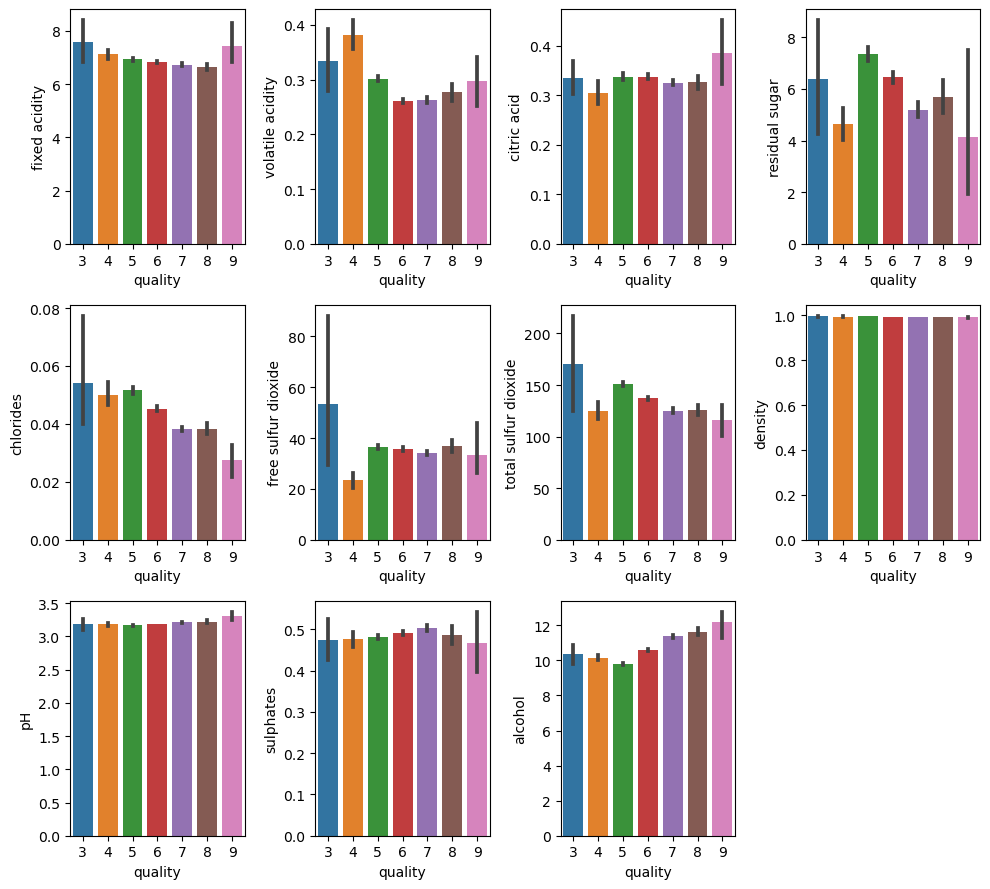

In [52]:
# white_wine--
fig = plt.figure(figsize=(10,9))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=data_white)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=data_white)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=data_white)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=data_white)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=data_white)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=data_white)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=data_white)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=data_white)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=data_white)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=data_white)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=data_white)

plt.tight_layout()

# Observation of white_wine from the above plot

**1) Quality does not follow any trend on any other features**

# Heatmap for expressing correlation

<Axes: >

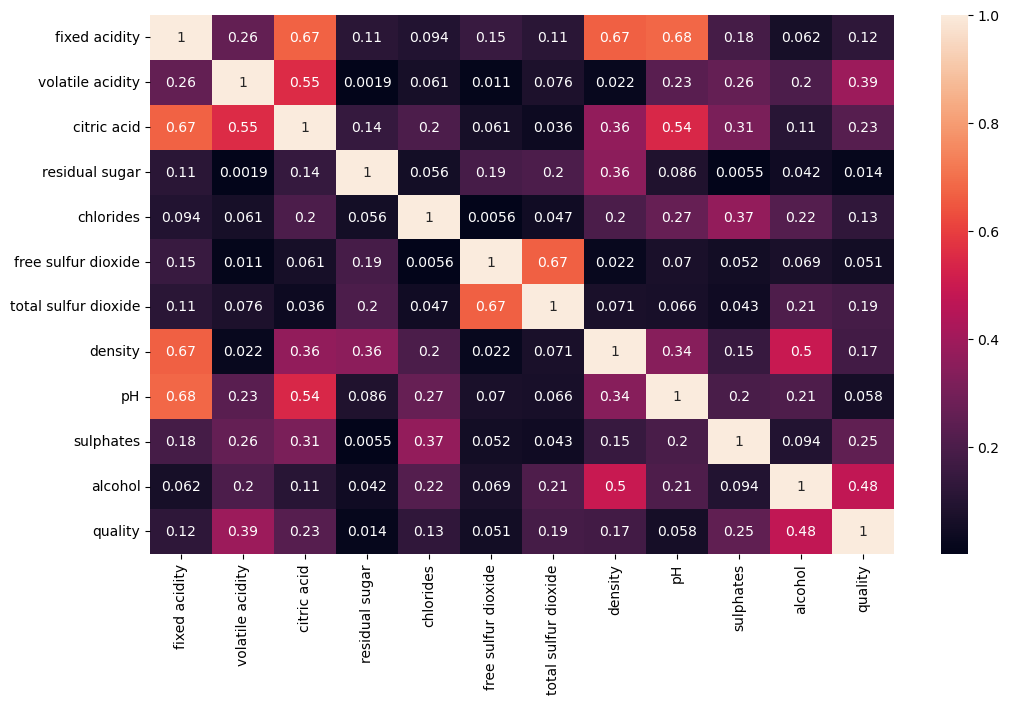

In [53]:
# Red_wine--
plt.subplots(figsize=(12,7))
sns.heatmap(abs(data_red.corr()), annot=True) # Show absolute values


<Axes: >

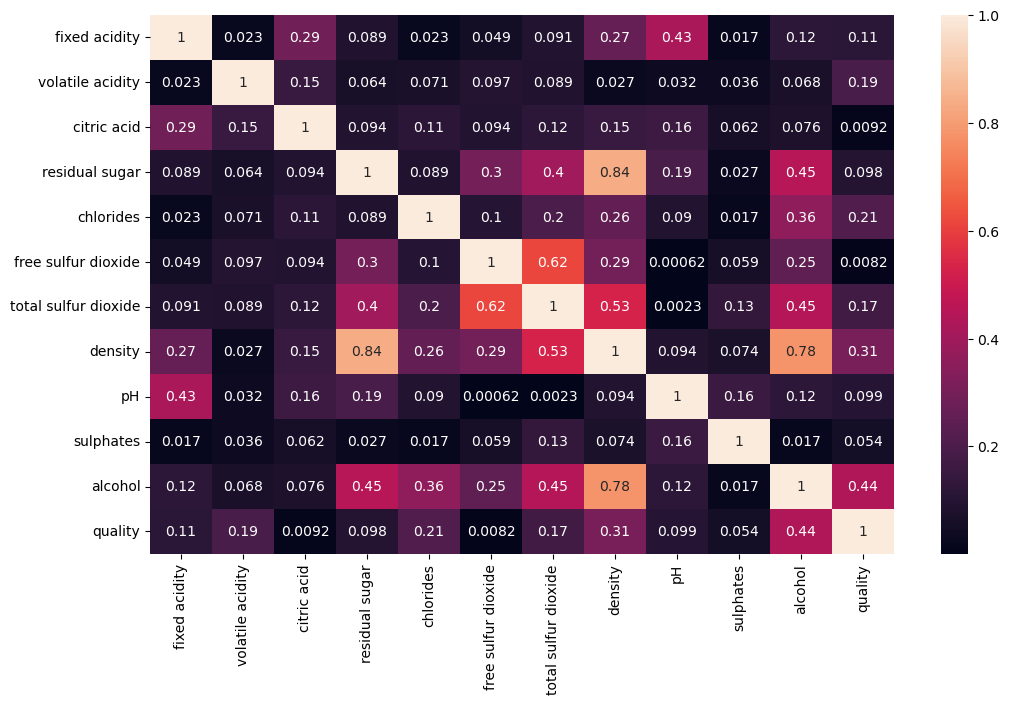

In [54]:
# White_wine--
plt.subplots(figsize=(12,7))
sns.heatmap(abs(data_white.corr()), annot=True) # Show absolute values


# Observation:

**Correlation is not too high between columns. Hence,all columns are used for training the model**

In [55]:
x_red=data_red.drop('quality',axis=1)
y_red=data_red['quality']

x_white=data_white.drop('quality',axis=1)
y_white=data_white['quality']


# Splitting the data into train and test

In [56]:
# red_wine__
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_red, y_red, test_size=0.3, random_state=7)
# white_wine__
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(x_white, y_white, test_size=0.3, random_state=7)

In [57]:
x_test_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6
674,10.8,0.40,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3
1508,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
1351,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
...,...,...,...,...,...,...,...,...,...,...,...
125,9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4
540,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8
1203,9.9,0.74,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4


# Scaling and transforming data

In [58]:
from sklearn.preprocessing import StandardScaler
# red_wine--
stdscale_red=StandardScaler().fit(x_train_red)
x_train_std_red=stdscale_red.transform(x_train_red)
x_test_std_red=stdscale_red.transform(x_test_red)



# white_wine---
stdscale_white=StandardScaler().fit(x_train_red)
x_train_std_white=stdscale_white.transform(x_train_white)
x_test_std_white=stdscale_white.transform(x_test_white)


In [59]:
x_train_std_red.shape

(1119, 11)

# **Red Wine**

In [60]:
# Accuracy of the red wine model:
# Accuracy of the red wine model with data from white wine 

 **i.Random forest**

In [62]:
param_grid_rf = {'n_estimators': [2,5,10,50,100]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(x_train_std_red, y_train_red)
print('Best hyper_parameters --> ', grid_search_rf.best_params_)

best_rf_model_a = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model_a.predict(x_test_std_red).round()
acc_rf = accuracy_score(y_test_red,y_pred_rf)

with open('model_a.pkl', 'wb') as file:
    pickle.dump(best_rf_model_a, file)
    
print("Accuracy of the red wine model:" ,acc_rf*100)
print("Accuracy of the red wine model with data from white wine :" ,accuracy_score(y_test_white,best_rf_model_a.predict(x_test_std_white).round())*100)

Best hyper_parameters -->  {'n_estimators': 100}
Accuracy of the red wine model: 68.95833333333333
Accuracy of the red wine model with data from white wine : 50.544217687074834


 **ii.Support vector regression with RBF kernel**

In [137]:

svr_regressor = SVR(kernel='rbf')

hyperprameters_svr = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_search_svr = GridSearchCV(svr_regressor, hyperprameters_svr, cv=5, scoring='neg_mean_absolute_error')
grid_search_svr.fit(x_train_std_red, y_train_red)
best_svr_model_b = grid_search_svr.best_estimator_
print('Best hyper_parameters --> ', grid_search_svr.best_params_)

y_pred_svc = best_svr_model_b.predict(x_test_std_red).round()

acc_svc = accuracy_score(y_test_red,y_pred_svc)


print("Accuracy of the red wine model:" ,acc_svc*100)
print("Accuracy of the red wine model with data from white wine :" ,accuracy_score(y_test_white,best_svr_model_b.predict(x_test_std_white).round())*100)


Best hyper_parameters -->  {'C': 1, 'gamma': 0.1}
Accuracy of the red wine model: 60.83333333333333
Accuracy of the red wine model with data from white wine : 46.59863945578231


**iii.Neural network with single hidden layer (output layer should have linear activation)**

In [ ]:
"""
nn_regressor = MLPRegressor()
param_grid_nn = {'hidden_layer_sizes':[(10,),(20,),(50,),(100,)], 'activation':['relu'],'beta_1':[0.1,0.2,0.5,0.9]} #define the hyperparameters oveer which we have to search for best model, here they are number of neurons and weight decay(beta1)}
grid_search_nn = GridSearchCV(nn_regressor, param_grid_nn, cv=5, scoring='neg_mean_absolute_error')
grid_search_nn.fit(x_train_std_red, y_train_red)
best_nn_model = grid_search_nn.best_estimator_
print('Best hyper_parameters --> ', grid_search_nn.best_params_)
# Evaluate models

y_pred_nn = best_nn_model.predict(x_test_std_red)

acc_nn = accuracy_score(y_test_red,y_pred_nn)

print("Neural Network accuracy:", acc_nn*100) 
"""

# Importance of each variable in different models for red wine

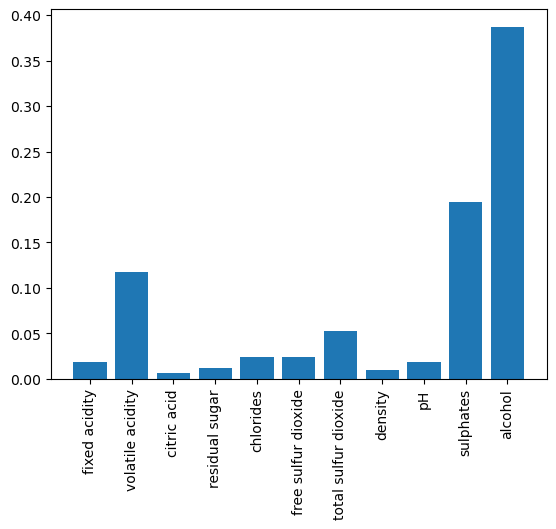

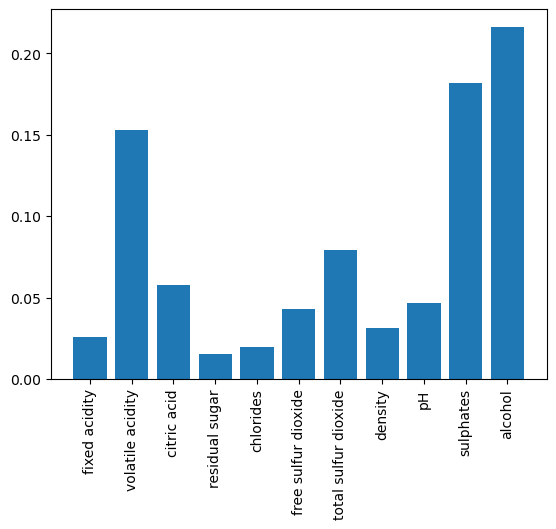

In [126]:
model_list=[grid_search_rf,grid_search_svr]


def plotFeatureImportance(myModel):
  r = permutation_importance(myModel.best_estimator_,x_test_std_red,  y_test_red,n_repeats=30,random_state=0) #calculate importance matrice
  model_weights= r.importances_mean # mean value of importance of each feature
  xarray=x_red.columns # on x axis it will be protine names
   
  plt.xticks(rotation=90) #to rotate the x axis lables to avoid the clutter reference:https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
  plt.bar(xarray,abs(model_weights))  #do a bar plot
  plt.show()



plotFeatureImportance(grid_search_rf) #feature importance of random forest
plotFeatureImportance(grid_search_svr) #feature importance of Support vector regression
#plotFeatureImportance(model_1_c)  #Neural network

**Observation:**

for both the above model 'alcohol' is important variable

# White Wine

In [146]:
# Accuracy of the white wine model:
# Accuracy of the white wine model with data from red wine 

 **i.Random forest**

In [142]:
param_grid_rf_w = {'n_estimators': [2,5,10,50,100]}
grid_search_rf_w = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_w, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf_w.fit(x_train_std_white, y_train_white)
print('Best hyper_parameters --> ', grid_search_rf_w.best_params_)

best_rf_model_w = grid_search_rf_w.best_estimator_

y_pred_rf_w = best_rf_model_w.predict(x_test_std_white).round()
acc_rf_w = accuracy_score(y_test_white,y_pred_rf_w)


print("Accuracy of the white wine model:" ,acc_rf_w*100)
print("Accuracy of the white wine model with data from red wine :" ,accuracy_score(y_test_red,best_rf_model_w.predict(x_test_std_red).round())*100)

Best hyper_parameters -->  {'n_estimators': 100}
Accuracy of the white wine model: 67.00680272108843
Accuracy of the white wine model with data from red wine : 43.75


 **ii.Support vector regression with RBF kernel**

In [144]:

svr_regressor_w = SVR(kernel='rbf')
hyperprameters_svr_w = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_search_svr_w = GridSearchCV(svr_regressor_w, hyperprameters_svr_w, cv=5, scoring='neg_mean_absolute_error')
grid_search_svr_w.fit(x_train_std_white, y_train_white)
best_svr_model_w = grid_search_svr_w.best_estimator_
print('Best hyper_parameters --> ', grid_search_svr_w.best_params_)

y_pred_svr = best_svr_model_w.predict(x_test_std_white).round()

acc_svr = accuracy_score(y_test_white,y_pred_svr)


print("Accuracy of the white wine model:" ,acc_svr*100)
print("Accuracy of the white wine model with data from red wine :" ,accuracy_score(y_test_red,best_svr_model_w.predict(x_test_std_red).round())*100)


Best hyper_parameters -->  {'C': 1, 'gamma': 0.1}
Accuracy of the white wine model: 56.734693877551024
Accuracy of the white wine model with data from red wine : 33.33333333333333


# Importance of each variable in different models for white wine

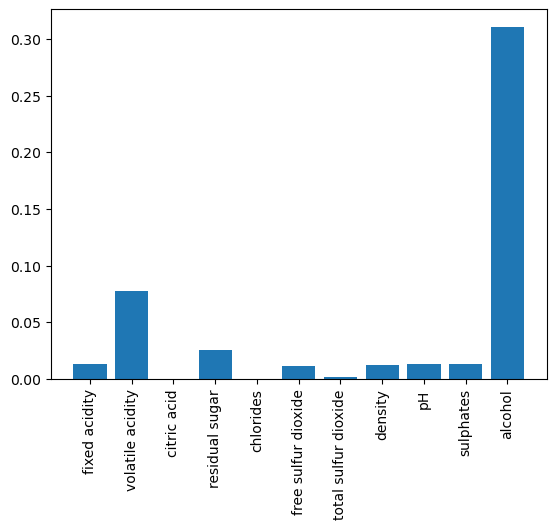

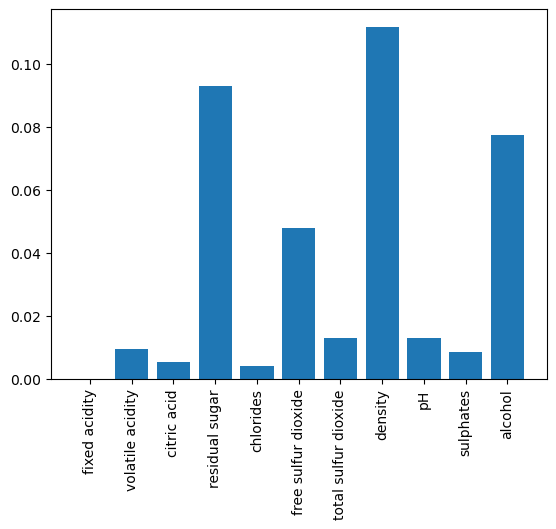

In [145]:
model_list=[grid_search_rf_w,grid_search_svr_w]


def plotFeatureImportance(myModel):
  r = permutation_importance(myModel.best_estimator_,x_test_std_white,  y_test_white,n_repeats=30,random_state=0) #calculate importance matrice
  model_weights= r.importances_mean # mean value of importance of each feature
  xarray=x_red.columns # on x axis it will be protine names
   
  plt.xticks(rotation=90) #to rotate the x axis lables to avoid the clutter reference:https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
  plt.bar(xarray,abs(model_weights))  #do a bar plot
  plt.show()



plotFeatureImportance(grid_search_rf) #feature importance of random forest
plotFeatureImportance(grid_search_svr) #feature importance of Support vector regression
#plotFeatureImportance(model_1_c)  #Neural network

**Observation:**

i.For random forest 'alcohol'is the important variable.

ii.for Support vector regression 'density' is the important variable.

There is significant difference in Accuracy of the white wine model with data from red wine and vice versa. so  the model for

 white wines is not applicable to red wines and vice versa
 
 

# Problem_2

In [2]:
mice_df = pd.read_excel('Data_Cortex_Nuclear.xls')

In [3]:
mice_df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


there are 1080 samples, and 82 columns.

Excluding 'mouse_id', 'genotype', 'treatment', 'behaviour', 'class', there are 77 features

First of all, we need to seperate input features from target variables.
Col 2-79 are features while col 82 are target values(8 class classifier)

In [4]:
features = mice_df.columns.values
features = features[1:78]
mice_df_c=mice_df['class']
print(features)
     

['DYRK1A_N' 'ITSN1_N' 'BDNF_N' 'NR1_N' 'NR2A_N' 'pAKT_N' 'pBRAF_N'
 'pCAMKII_N' 'pCREB_N' 'pELK_N' 'pERK_N' 'pJNK_N' 'PKCA_N' 'pMEK_N'
 'pNR1_N' 'pNR2A_N' 'pNR2B_N' 'pPKCAB_N' 'pRSK_N' 'AKT_N' 'BRAF_N'
 'CAMKII_N' 'CREB_N' 'ELK_N' 'ERK_N' 'GSK3B_N' 'JNK_N' 'MEK_N' 'TRKA_N'
 'RSK_N' 'APP_N' 'Bcatenin_N' 'SOD1_N' 'MTOR_N' 'P38_N' 'pMTOR_N'
 'DSCR1_N' 'AMPKA_N' 'NR2B_N' 'pNUMB_N' 'RAPTOR_N' 'TIAM1_N' 'pP70S6_N'
 'NUMB_N' 'P70S6_N' 'pGSK3B_N' 'pPKCG_N' 'CDK5_N' 'S6_N' 'ADARB1_N'
 'AcetylH3K9_N' 'RRP1_N' 'BAX_N' 'ARC_N' 'ERBB4_N' 'nNOS_N' 'Tau_N'
 'GFAP_N' 'GluR3_N' 'GluR4_N' 'IL1B_N' 'P3525_N' 'pCASP9_N' 'PSD95_N'
 'SNCA_N' 'Ubiquitin_N' 'pGSK3B_Tyr216_N' 'SHH_N' 'BAD_N' 'BCL2_N' 'pS6_N'
 'pCFOS_N' 'SYP_N' 'H3AcK18_N' 'EGR1_N' 'H3MeK4_N' 'CaNA_N']


In [5]:
df_features = mice_df[features].copy()
df_features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


**Observe class column**

In [6]:
pd.unique(mice_df['class'])


array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

<Axes: xlabel='class', ylabel='count'>

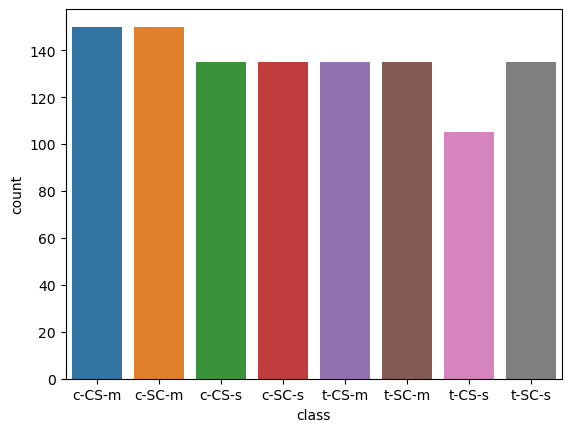

In [374]:
sns.countplot(x='class',data=mice_df)

**The 'Class' will be predicted(as output)**

In [375]:
for col in df_features.columns.values: # for each column
  unique_entries = pd.unique(df_features[col]) # unique elements in a column
  print(f"The column '{col}' has {len(unique_entries)} unique entries, and {df_features[col].isnull().sum()} NaN values")
     

The column 'DYRK1A_N' has 1078 unique entries, and 3 NaN values
The column 'ITSN1_N' has 1077 unique entries, and 3 NaN values
The column 'BDNF_N' has 1078 unique entries, and 3 NaN values
The column 'NR1_N' has 1078 unique entries, and 3 NaN values
The column 'NR2A_N' has 1078 unique entries, and 3 NaN values
The column 'pAKT_N' has 1077 unique entries, and 3 NaN values
The column 'pBRAF_N' has 1076 unique entries, and 3 NaN values
The column 'pCAMKII_N' has 1078 unique entries, and 3 NaN values
The column 'pCREB_N' has 1078 unique entries, and 3 NaN values
The column 'pELK_N' has 1078 unique entries, and 3 NaN values
The column 'pERK_N' has 1078 unique entries, and 3 NaN values
The column 'pJNK_N' has 1077 unique entries, and 3 NaN values
The column 'PKCA_N' has 1078 unique entries, and 3 NaN values
The column 'pMEK_N' has 1078 unique entries, and 3 NaN values
The column 'pNR1_N' has 1078 unique entries, and 3 NaN values
The column 'pNR2A_N' has 1078 unique entries, and 3 NaN values


# Observation:

**There are significant number of NaN values**

Perform multivariable imputation for imputing the missing values in data.

In [7]:
#reference:https://scikit-learn.org/stable/modules/impute.html
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_features) #fit the imputation
mice_df_features_arr=imp.transform(df_features) #apply the fitted transform
mice_df_features = pd.DataFrame(mice_df_features_arr, columns = df_features.columns) #convert the numpy array back to dataframe, use column headings as of original dataset

C:\Users\kumar\anaconda3\New folder\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [8]:
mice_df_features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.108588,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.110232,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.110037,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118320,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.117445,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.155506,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.149545,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.170529,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.175565,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


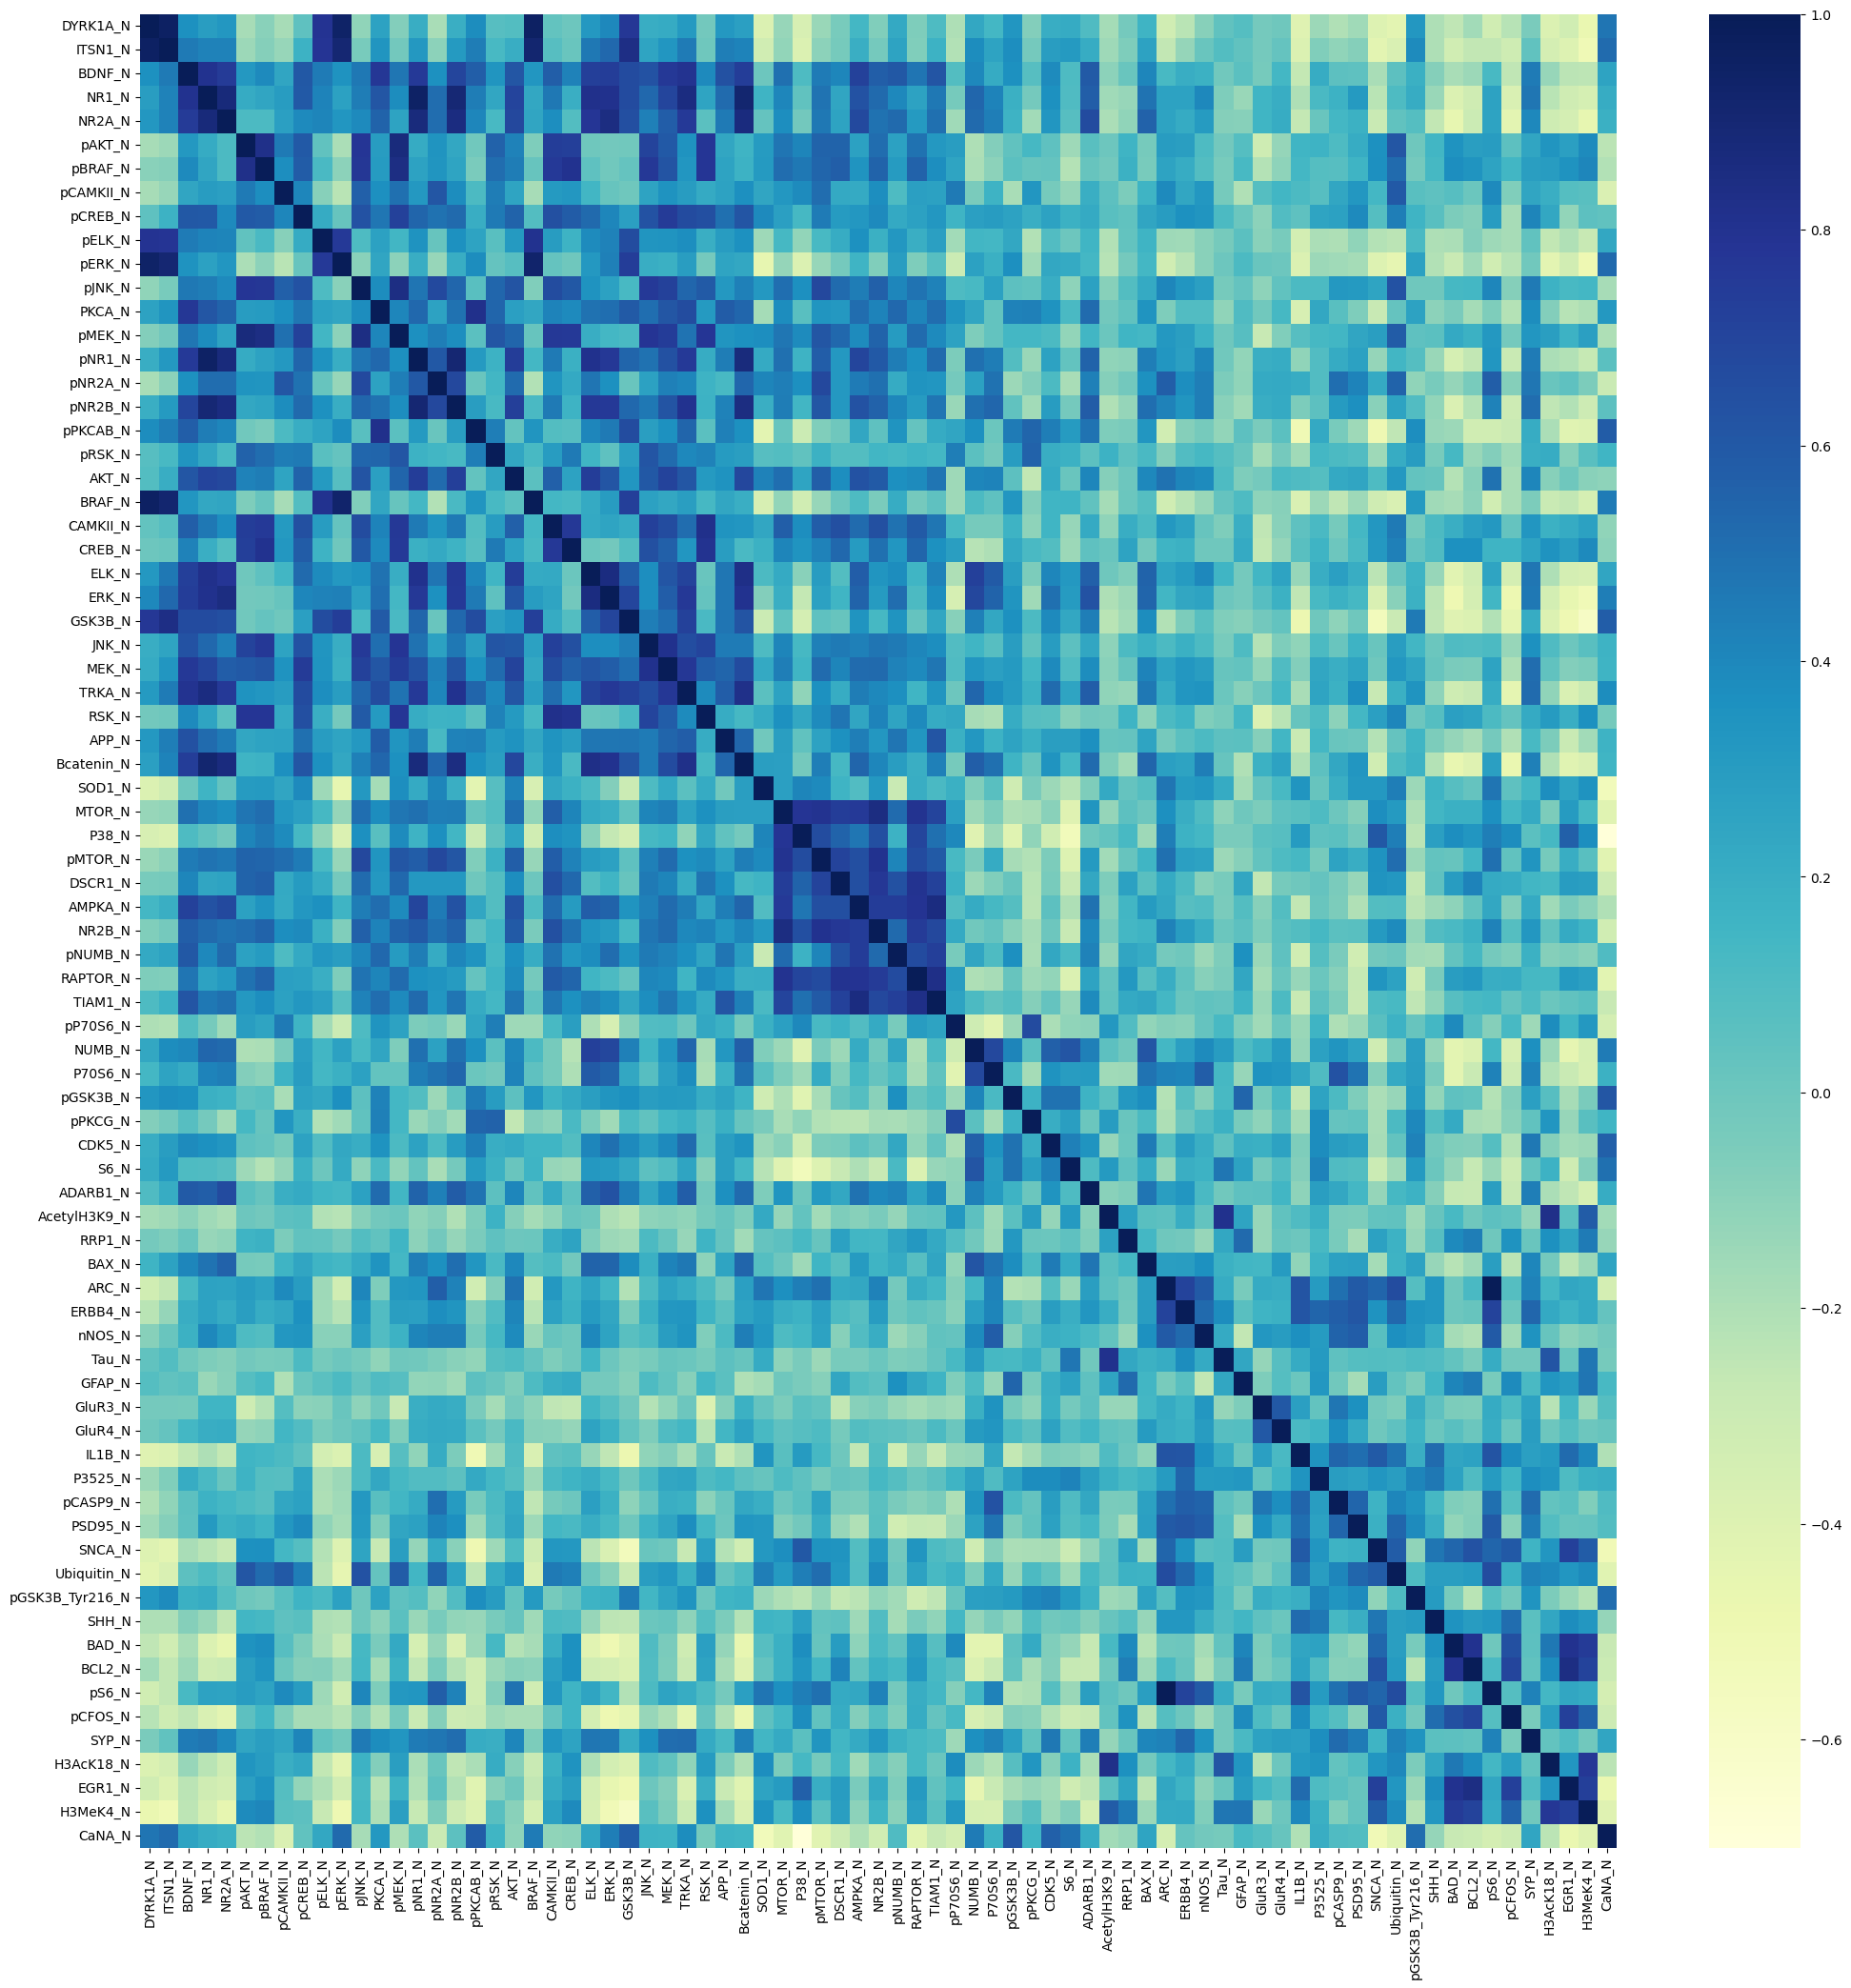

In [378]:
plt.figure(figsize=(25,25))

dataplot = sns.heatmap(df_features.corr(), cmap="YlGnBu", annot=False) #plot the heatmap of  feature correlations #changed annot to False to avoid cluttre

plt.show()

In [379]:
mice_df_features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.108588,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.110232,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.110037,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118320,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.117445,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.155506,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.149545,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.170529,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.175565,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


**check for the correlation again**

In [25]:

abs(mice_df_features.corr())


,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
BDNF_N,1.000000,0.749385,0.317379,0.390485,0.246719,0.603712,0.451596,0.464885,0.770637,0.473950,...,0.182947,0.080783,0.151946,0.127660,0.241015,0.450263,0.206424,0.210947,0.262734,0.262554
NR2A_N,0.749385,1.000000,0.108708,0.110524,0.280963,0.391410,0.409133,0.391140,0.549570,0.258886,...,0.076080,0.256812,0.471812,0.262568,0.390472,0.400926,0.354609,0.403145,0.498207,0.186324
pAKT_N,0.317379,0.108708,1.000000,0.825057,0.456422,0.597412,0.037583,0.778550,0.302409,0.873229,...,0.001570,0.142726,0.360790,0.300167,0.068373,0.247624,0.168976,0.289889,0.386736,0.237644
pBRAF_N,0.390485,0.110524,0.825057,1.000000,0.371961,0.587109,0.117060,0.768879,0.307416,0.841752,...,0.027271,0.134069,0.411111,0.258681,0.157513,0.284138,0.179723,0.363550,0.429616,0.213328
pCAMKII_N,0.246719,0.280963,0.456422,0.371961,1.000000,0.404049,0.083029,0.561638,0.366774,0.495595,...,0.065664,0.045114,0.030255,0.390304,0.044052,0.245075,0.036403,0.022112,0.026505,0.375938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,0.450263,0.400926,0.247624,0.284138,0.245075,0.412343,0.039377,0.456388,0.377627,0.334631,...,0.348295,0.056826,0.132456,0.423405,0.029933,1.000000,0.043664,0.133182,0.075676,0.246107
H3AcK18_N,0.206424,0.354609,0.168976,0.179723,0.036403,0.070560,0.268098,0.016904,0.151287,0.134560,...,0.216749,0.183550,0.444541,0.166748,0.311045,0.043664,1.000000,0.465628,0.773901,0.324172
EGR1_N,0.210947,0.403145,0.289889,0.363550,0.022112,0.050855,0.176579,0.123220,0.210005,0.184119,...,0.147476,0.421453,0.871160,0.254810,0.786985,0.133182,0.465628,1.000000,0.811137,0.441195
H3MeK4_N,0.262734,0.498207,0.386736,0.429616,0.026505,0.093477,0.225636,0.150153,0.231141,0.295848,...,0.137300,0.371439,0.810379,0.178836,0.627547,0.075676,0.773901,0.811137,1.000000,0.355275


**setting the threshold level for correlation**

In [12]:
corr_threshold=0.9 #setting the threshold for correlation

corr_pairs=[] #list to save the highly correlated pairs

for i in range (0,mice_df_features.corr().shape[0]): #scan over the rows
    
  for j in range (i,mice_df_features.corr().shape[1]): #scan over the columns (we start j from i, so that there wont be repeatations, also be detected as highly correlataed, but both are indeed the same )
    if(abs(np.array(mice_df_features.corr())[i,j])> corr_threshold and i!=j):     #if threshold crossess a certain value and its not the diagonal element
      pair_tup=(i,j) #create tupple of i and j pair
      corr_pairs.append(pair_tup)   #append tupple to list

In [13]:
corr_pairs # highly correlated pair

[(0, 1),
 (0, 10),
 (0, 20),
 (1, 10),
 (1, 20),
 (3, 14),
 (3, 31),
 (10, 20),
 (14, 16),
 (53, 70),
 (69, 74)]

**removing the highly correlated pair**

In [14]:
feature_to_remove=[]
for i in range (0,len(corr_pairs)): # scan over all the tupples
  feature_to_remove.append(corr_pairs[i][0]) # first entry in the tupple, add to the list
feature_to_remove=np.array(feature_to_remove) #convert list to np array
feature_to_remove=np.unique(feature_to_remove) #remove duplicated values reference:https://www.codespeedy.com/remove-duplicate-elements-from-a-numpy-array-in-python/

In [15]:
# remove the columns 'feature_to_remove' from the dataframe  https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
mice_df_features.drop(mice_df_features.columns[feature_to_remove], axis=1, inplace=True) #pass which columns to remove(obtained above)
mice_df_features

,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,2.252515,2.303608,-0.346364,-0.159145,-0.898780,0.602488,0.691065,-0.137331,1.623938,0.473059,...,-0.182482,-1.304799,-1.211986,-1.065782,-0.905525,-0.285612,-0.804348,-1.280072,-1.451560,1.065407
1,1.879300,1.976400,-0.519281,-0.334961,-0.961860,0.441153,0.359576,-0.278557,1.303602,0.134651,...,0.005342,-0.906305,-1.398706,-1.045682,-1.070330,-0.067614,-0.841001,-1.207811,-1.399248,1.279698
2,2.011886,1.908860,-0.582384,-0.227394,-0.968674,0.541754,0.284380,-0.428345,1.208061,0.143138,...,-0.021821,-1.138084,-1.341593,-0.925842,-0.992288,-0.154987,-0.842184,-1.245788,-1.465017,1.856178
3,0.801646,1.219775,-0.248875,-0.199980,-1.069978,-0.172278,0.356808,-0.323299,1.133008,0.839570,...,-0.164242,-1.192335,-0.895174,-1.284424,-0.785579,-0.818610,-0.600558,-0.938627,-1.117768,1.143960
4,0.805213,0.940064,-0.483952,-0.304972,-1.084116,-0.628369,0.161944,-0.511471,0.872606,0.061919,...,0.317047,-0.726905,-0.983597,-1.172352,-0.808864,-0.179419,-0.756105,-1.094143,-1.091393,1.582797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-1.302518,-1.331998,-0.516891,-0.392540,-0.813742,-0.162666,-0.795168,-0.374001,-1.304741,-0.301050,...,1.210623,1.685844,0.909574,-0.400315,2.168368,-1.083593,1.856823,0.309358,2.117968,0.085264
1076,-1.367870,-1.115953,0.433476,0.023426,-0.791325,0.114500,-0.745455,-0.547011,-1.306534,-0.489149,...,1.430620,1.950054,0.908953,-0.553809,1.854775,-1.065958,1.946282,0.216753,1.495666,0.084176
1077,-1.723129,-1.738639,-0.302253,-0.756393,-1.195666,-0.843215,-1.167557,-1.306328,-1.851022,-0.418796,...,1.355538,2.213482,1.729003,-0.180191,1.142410,-0.360541,1.889748,0.844462,2.597486,0.293389
1078,-1.523269,-1.563583,-0.585128,-0.305106,-1.121214,-0.631872,-1.085516,-0.969650,-1.794183,0.051502,...,1.489955,2.760496,1.903554,0.264369,2.700099,-0.728523,2.080604,1.327013,2.778335,0.208899


In [27]:
#encode the labels into numbers
label_encoder = preprocessing.LabelEncoder()
mice_df_class_enc=label_encoder.fit_transform(mice_df_c)


# Splitting the data into train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mice_df_features, mice_df_class_enc, test_size=0.2, random_state=42)

# Scaling and transforming data

In [29]:
from sklearn.preprocessing import StandardScaler
stdscale=StandardScaler().fit(X_train)
x_train_std=stdscale.transform(X_train)
x_test_std=stdscale.transform(X_test)

**Now data has been prepared and we can run models on it**

# i.Random forest 

In [31]:
# Define the hyperparameters to search over
parameters_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 80],   # Maximum depth of the trees

}
rf_classifier = RandomForestClassifier(random_state=42)

model_1_a = GridSearchCV(rf_classifier, parameters_rf, cv=5, scoring='f1_micro')
model_1_a.fit(x_train_std,y_train)
print('Best hyper_parameters --> ', model_1_a.best_params_)

best_rf_model_mice = model_1_a.best_estimator_
y_pred_rf_mice = best_rf_model_mice.predict(x_test_std)
acc_rf_mice = accuracy_score(y_test,y_pred_rf_mice)


print("Accuracy of the rf model:" ,acc_rf_mice*100)

Best hyper_parameters -->  {'max_depth': 20, 'n_estimators': 100}
Accuracy of the rf model: 98.14814814814815


# ii.Support vector classification using RBF kernel

In [33]:
#the kernal width is given by hyperparameter 'gamma' reference:https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

parameters = {'kernel':['rbf'], 'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.0001,0.001,0.01,0.1,1,10,100]} #define the hyperparameters oveer which we have to search for best model, here we only need rbf kernal and several values of C and gamma 
svc = SVC() #define model,in this case its SVC (support vector classifier)
model_1_b = GridSearchCV(svc, parameters,cv=5,scoring='f1_micro') #gridsearch cv will search over all the hyperparameters, cv=5 indicates 5 fold cross validation.F1_micro score will be the matrice
model_1_b.fit(x_train_std,y_train) #fit the model over all gridsearch 
print('Best hyper_parameters --> ', model_1_b.best_params_)

best_rb_model= model_1_b.best_estimator_
y_pred_rb_mice = best_rb_model.predict(x_test_std)
acc_rb= accuracy_score(y_test,y_pred_rb_mice)


print("Accuracy of the SVC model:" ,acc_rb*100)

Best hyper_parameters -->  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of the SVC model: 99.53703703703704


**See if removing some features systematically will improve your models (e.g. using recursive feature elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).**

In [34]:
selector = RFECV(model_1_a.best_estimator_, step=1, cv=5) #passing my model
selector = selector.fit(x_train_std,y_train) #fitting the data

In [35]:
#Reference:https://www.kdnuggets.com/2020/10/feature-ranking-recursive-feature-elimination-scikit-learn.html
selector.ranking_ #which tells the ranking of the feature

array([ 7,  2,  3, 17,  1,  1,  1,  1,  1,  5,  1, 13,  1,  1,  1,  1,  1,
       18,  1, 11,  1,  6,  9,  1, 10,  1, 14,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,  1, 16,  1,  1, 19,
       12,  1])

In [36]:
selector.n_features_ #optimum number of features

52

52 features has rank '1'and selected optimum

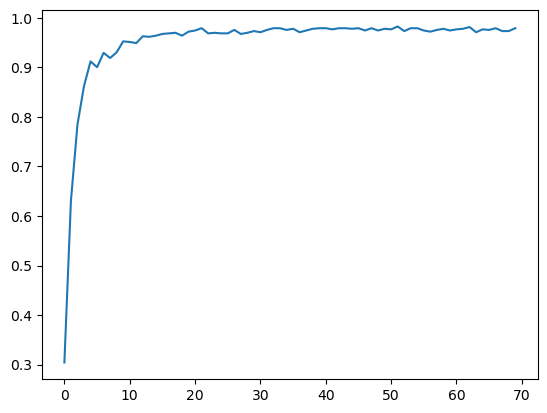

In [37]:
#this will tell us the accuracy if n features are selected
#it gives, mean of all CV folds so we can just use that
selector.cv_results_["mean_test_score"]
plt.plot(selector.cv_results_["mean_test_score"])

In the above plot,we can see peak near 52 thats why it told it as optimum number of features

In [39]:
# it will give the important proteins
true_array=np.where(selector.support_== True)[0]
print("\n important protines are")
imp_protines=mice_df_features.columns[true_array]  #columns pertaining to 'true_array' array (importamt protines)
print(imp_protines)


 important protines are
Index(['pCAMKII_N', 'pCREB_N', 'pELK_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N',
       'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'ELK_N', 'GSK3B_N',
       'TRKA_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N',
       'NUMB_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N',
       'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ERBB4_N', 'nNOS_N', 'Tau_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N',
       'H3AcK18_N', 'CaNA_N'],
      dtype='object')


RFECV only takes linear model and doesnt work for non linear ones, therefore i could not able to apply on other model

# Question_3

a. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning the ConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks that you do not need. [2]

In [407]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [408]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms_updated = {
    'train': torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir_updated = r'C:\Users\kumar\Assign_2_iml\hymenoptera_data'
image_datasets_updated = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir_updated, x),
                                          data_transforms_updated[x])
                  for x in ['train', 'val']}
dataloaders_updated = {x: torch.utils.data.DataLoader(image_datasets_updated[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes_updated = {x: len(image_datasets_updated[x]) for x in ['train', 'val']}
class_names_updated = image_datasets_updated['train'].classes

device_updated = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [409]:
arr1=image_datasets_updated['train'][0][0].numpy() #reference:https://www.geeksforgeeks.org/how-to-convert-pytorch-tensor-to-numpy-array/
arr1.shape

(3, 224, 224)

In [410]:
train_images = []  # Images
train_labels = []  # Ground truth labels

# Append training images and labels to corresponding lists
for i in range(len(image_datasets_updated['train'])-1):
    train_images.append(image_datasets_updated['train'][i][0].numpy())
    train_labels.append(image_datasets_updated['train'][i][1])

# Do the same with validation dataset
val_images = []  # Images
val_labels = []  # Ground truth labels

for i in range(len(image_datasets_updated['val'])-1):
    val_images.append(image_datasets_updated['val'][i][0].numpy())
    val_labels.append(image_datasets_updated['val'][i][1])

# Convert lists to numpy arrays
train_images_np = np.array(train_images)
val_images_np = np.array(val_images)

train_labels_np = np.array(train_labels)
val_labels_np = np.array(val_labels)


In [411]:
train_images_np.shape

(243, 3, 224, 224)

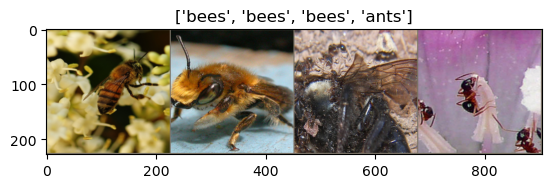

In [412]:
def show_tensor_images(tensor_images, title=None):
    """Show tensor images."""
    tensor_images = tensor_images.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    tensor_images = std * tensor_images + mean
    tensor_images = np.clip(tensor_images, 0, 1)
    plt.imshow(tensor_images)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
# Get a batch of training data
inputs, classes = next(iter(dataloaders_updated['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
show_tensor_images(out, title=[class_names_updated[x] for x in classes])


In [413]:
# Load pre-trained ResNet18 model
resnet_model = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters in the model
for param in resnet_model.parameters():
    param.requires_grad = False

# Get the number of input features for the fully connected layer
num_ftrs = resnet_model.fc.in_features

# Replace the fully connected layer with a new one (with output size 2)
resnet_model.fc = nn.Linear(num_ftrs, 2)  # Assuming it's a binary classification task


In [414]:
# Load pre-trained ResNet18 model
resnet_model = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters in the model
for param in resnet_model.parameters():
    param.requires_grad = False

# Remove the fully connected layer to access features from the last hidden layer
resnet_model.fc = nn.Sequential()  # Remove the last fully connected layer


In [415]:
# Get a sample image from the training dataset
sample_image = image_datasets_updated['train'][1][0]

# Add a batch dimension since ResNet expects a 4D tensor
sample_image = torch.unsqueeze(sample_image, 0)

# Pass the sample image through the ResNet model to extract features
resnet_features = resnet_model(sample_image)

# Convert the features to a numpy array
resnet_features_np = resnet_features.numpy()

# Display the extracted features
resnet_features_np


array([[0.81014967, 0.92950356, 0.9195076 , 1.1273712 , 0.9444939 ,
        0.85891855, 0.947232  , 1.1461141 , 0.9110283 , 0.9530876 ,
        0.9019767 , 0.83515316, 0.9587706 , 0.95325214, 0.88708776,
        0.9605023 , 0.94056463, 1.3881932 , 0.94958675, 0.8655957 ,
        0.9221369 , 1.1554997 , 0.83401215, 0.9617456 , 0.86032337,
        0.95188934, 0.9579152 , 1.0245231 , 0.8334107 , 0.8504588 ,
        0.8448474 , 0.89817786, 0.944413  , 0.8893468 , 0.8907898 ,
        0.9126314 , 0.9210561 , 0.9816648 , 0.85686135, 0.9185198 ,
        0.8824277 , 0.8577764 , 0.928851  , 0.9394297 , 0.8849212 ,
        0.8541844 , 0.8957926 , 1.1039993 , 0.9343356 , 0.85332185,
        0.9876556 , 0.95090204, 0.82695365, 0.9313593 , 1.0185497 ,
        0.9539014 , 1.1654363 , 0.9456611 , 1.1299707 , 0.9918833 ,
        0.9485164 , 0.954899  , 0.9874237 , 0.8757043 , 0.8723283 ,
        1.062756  , 0.8694328 , 0.96206236, 1.0435464 , 0.90774214,
        0.88194764, 0.82745785, 0.90403515, 0.93

In [416]:
resnet_features_np.shape

(1, 512)

**b.Write a function that outputs ResNet18 features for a given input image. Extract features for training images
(in image_datasets['train']). You should get an Nx512 dimensional array. [2]**

Now that we know how to extract the features, we can  define a function to do that

In [423]:
def extract_resnet18_features(input_img):
  
    # Load pre-trained ResNet18 model
    resnet_model = torchvision.models.resnet18(pretrained=True)
    
    # Freeze all parameters in the model
    for param in resnet_model.parameters():
        param.requires_grad = False
    
    # Remove the fully connected layer to access features from the last hidden layer
    resnet_model.fc = nn.Sequential()
    
    # Add a batch dimension since ResNet expects a 4D tensor
    input_img = torch.unsqueeze(input_img, 0)
    
    # Pass the input image through the ResNet model to extract features
    resnet_features = resnet_model(input_img)
    
    # Convert the features to a numpy array and flatten
    resnet_features = np.ndarray.flatten(resnet_features.numpy())
    
    return resnet_features


get features for all the images

In [424]:
image_features_resnet18_dataset = []    # List to store the features of all images
image_target_dataset = []  # List to store ground truth labels

# Extract features and ground truth labels for each image in the training dataset
for i in range(0,len(image_datasets_updated['train'])-1):
    # Extract features using the previously defined function
    features = extract_resnet18_features(image_datasets_updated['train'][i][0])
    # Get the ground truth label
    target = image_datasets_updated['train'][i][1]
    # Append features and labels to their respective lists
    image_features_resnet18_dataset.append(features)
    image_target_dataset.append(target)

# Encoding ground truth labels into numbers
label_encoder = preprocessing.LabelEncoder()
image_target_dataset_encoded = label_encoder.fit_transform(image_target_dataset)

# Now 'image_features_resnet18_dataset' contains the extracted features and 'image_target_dataset_encoded' contains the encoded labels


C:\Users\kumar\anaconda3\New folder\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\kumar\anaconda3\New folder\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


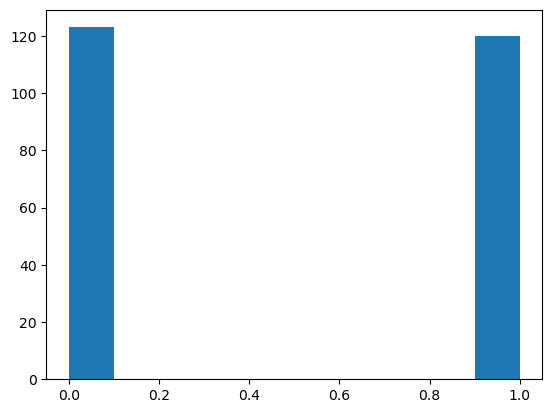

In [425]:
plt.hist(image_target_dataset_encoded)
plt.show()

In [426]:
# Convert lists to numpy arrays for convenience
features_np = np.array(image_features_resnet18_dataset)
labels_np = np.array(image_target_dataset)

# Check the shape of the feature array
print("Shape of feature array:", features_np.shape)

Shape of feature array: (243, 512)


Now that we have the normalized dataset, we can run the models

In [429]:
# Make a copy of the feature dataset
features_np_copy = features_np.copy()

# Normalize the dataset (column-wise normalization)
features_np_norm = (features_np - features_np.mean(axis=0)) / features_np.std(axis=0)

# Column-wise normalization: 'axis=0' ensures column-wise mean and standard deviation
# Learned about column-wise statistics calculation from: https://stackoverflow.com/questions/29661574/normalize-numpy-array-columns-in-python


**c.Compare RBF kernel SVM(do grid search onkernel width and regularization) and random forest (do
 grid search on max depth and numberof trees). Test the final model on test data and show the
 results-- accuracy and F1 score.**

**RBF Kernal SVM**

In [431]:
parameters = {'kernel':['rbf'], 'C':[0.1,5,10,100,500],'gamma':[0.0001,0.001,0.01,0.1,1,10,100]} #define the hyperparameters oveer which we have to search for best model, here we only need rbf kernal and several values of C and gamma 
svc = svm.SVC() #define model,in this case its SVC (support vector classifier)
model_1_a_ = GridSearchCV(svc, parameters,cv=10,scoring='f1') #gridsearch cv will search over all the hyperparameters, cv=5 indicates 5 fold cross validation.F1 score will be the matrice

model_1_a_.fit(features_np_norm , image_target_dataset) #fit the model over all gridsearch 
model_1_a_.best_estimator_ ,model_1_a_.best_score_  #state the best esstimator and its score


(SVC(C=100, gamma=0.0001), 0.6157005305906907)

**Random foresT**

In [432]:
param_grid_rf_ = {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 200]}
rf_model_b_= GridSearchCV(RandomForestClassifier(), param_grid_rf_, cv=5, scoring='f1_macro')
rf_model_b_.fit(features_np_norm , image_target_dataset)
rf_model_b_.best_estimator_ ,rf_model_b_.best_score_ 

(RandomForestClassifier(max_depth=5), 0.6274552569917203)

**RUNNING MODEL ON TEST DATA**

We take the test images, extract the features as above , normalize and run the above model on it to see the result

In [433]:
# List to store the features of all images in the validation dataset
image_test_features_resnet18_dataset = []    

# List to store ground truth labels of images in the validation dataset
image_test_target_dataset = []

# Extract features and ground truth labels for each image in the validation dataset
for i in range(len(image_datasets_updated['val'])-1):
    # Extract features using the previously defined function
    features = extract_resnet18_features(image_datasets_updated['val'][i][0])
    # Get the ground truth label
    target = image_datasets_updated['val'][i][1]
    # Append features and labels to their respective lists
    image_test_features_resnet18_dataset.append(features)
    image_test_target_dataset.append(target)


C:\Users\kumar\anaconda3\New folder\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\kumar\anaconda3\New folder\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [434]:
# Convert lists to numpy arrays for convenience
test_features_np = np.array(image_test_features_resnet18_dataset)
test_labels_np = np.array(image_test_target_dataset)

# Check the shape of the feature array
print("Shape of test feature array:", test_features_np.shape)

# Encoding ground truth labels into numbers
label_encoder = preprocessing.LabelEncoder()
test_labels_np_encoded = label_encoder.fit_transform(image_test_target_dataset)

# Now 'test_features_np' contains the extracted features and 'test_labels_np_encoded' contains the encoded labels

Shape of test feature array: (152, 512)


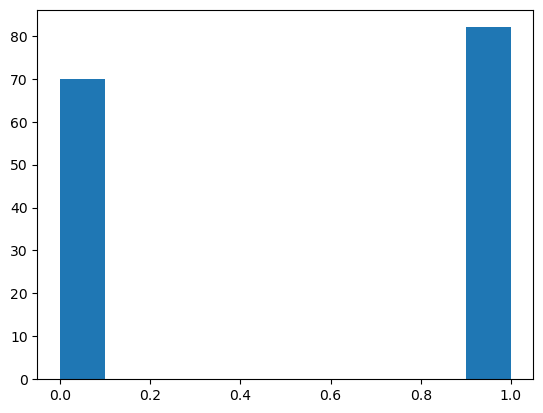

In [435]:
plt.hist(test_labels_np_encoded)
plt.show()

In [436]:
# Make a copy of the test feature dataset
test_features_np_copy = test_features_np.copy()

# Normalize the dataset (column-wise normalization)
test_features_np_norm = (test_features_np - test_features_np.mean(axis=0)) / test_features_np.std(axis=0)


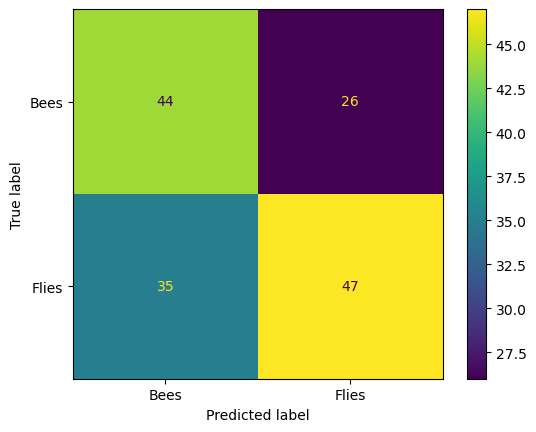


Precision, Recall, F1-score, and Support respectively are:

Precision: 0.6003988208774059
Recall: 0.6008710801393728
F1-score: 0.5985278198744317
Support: None


In [438]:
# Predict using the best estimator
predicted = model_1_a_.best_estimator_.predict(test_features_np_norm)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels_np_encoded, predicted)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bees', 'Flies'])
cm_display.plot()
plt.show()

# Calculate precision, recall, f1-score, and support
print("\nPrecision, Recall, F1-score, and Support respectively are:\n")
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels_np, predicted, average='macro') #'macro' calculates the metrics for each label and averages them

# Print the precision, recall, f1-score, and support
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)


With the other model

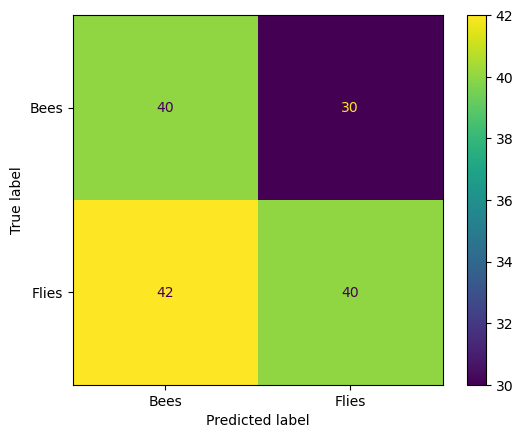


Precision, Recall, F1-score, and Support respectively are:

Precision: 0.5296167247386759
Recall: 0.5296167247386759
F1-score: 0.5263157894736842
Support: None


In [439]:
# updated
# Predict using the best estimator
predicted = rf_model_b_.best_estimator_.predict(test_features_np_norm)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels_np_encoded, predicted)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bees', 'Flies'])
cm_display.plot()
plt.show()

# Calculate precision, recall, f1-score, and support
print("\nPrecision, Recall, F1-score, and Support respectively are:\n")
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels_np, predicted, average='macro') #'macro' calculates the metrics for each label and averages them

# Print the precision, recall, f1-score, and support
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)


 **4. Deployonemodelfrompart 1on alocal webserver with a web frontend (e.g. using streamlit
 ). Add some GUI
 elements, such as sliders
 for acidity, citrus etc. [2] Most of this should be in the video demo**

deployment is in py in the folder

demo video link:https://drive.google.com/file/d/1XJiZ1Agxzgv86fuWHUUutuAzBk42QfvL/view?usp=sharing